Keyboard patterns database. 10 features. 4 classes.
1 batches of 24 instances



METHOD: Static knn as classifier
Execution time:  0.004944987654320988
Average error: 12.5
Average macro-F1: 1.0
Average micro-F1: 1.0
Average Accuracy:  87.5
Standard Deviation:  0.0
Variance:  0.0


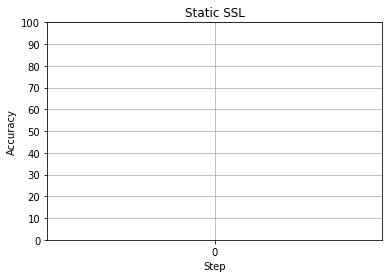

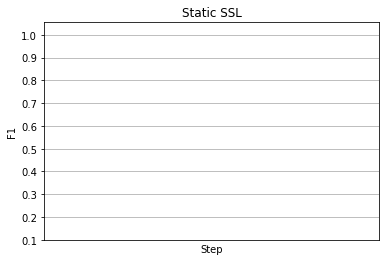

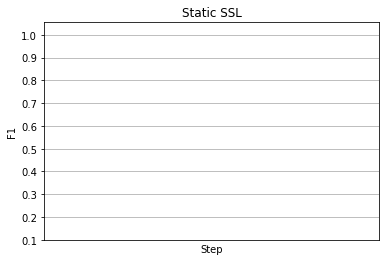




METHOD: Sliding knn as classifier
Execution time:  0.003579654320987613
Average error: 12.5
Average macro-F1: 1.0
Average micro-F1: 1.0
Average Accuracy:  87.5
Standard Deviation:  0.0
Variance:  0.0


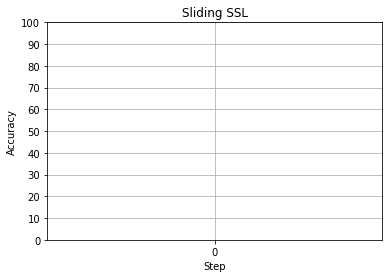

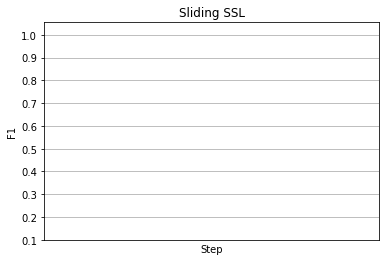

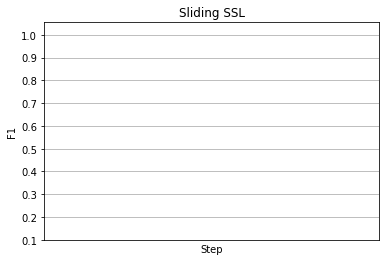




METHOD: Incremental knn as classifier
Execution time:  0.0033197037037038246
Average error: 12.5
Average macro-F1: 1.0
Average micro-F1: 1.0
Average Accuracy:  87.5
Standard Deviation:  0.0
Variance:  0.0


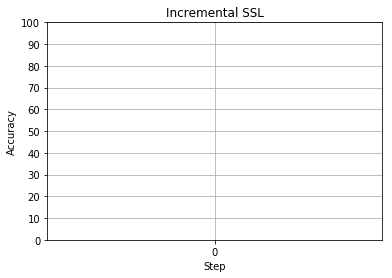

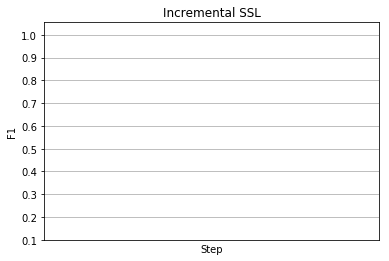

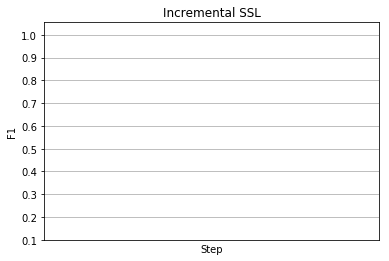




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  0.0034319012345678246
Average error: 12.5
Average macro-F1: 1.0
Average micro-F1: 1.0
Average Accuracy:  87.5
Standard Deviation:  0.0
Variance:  0.0


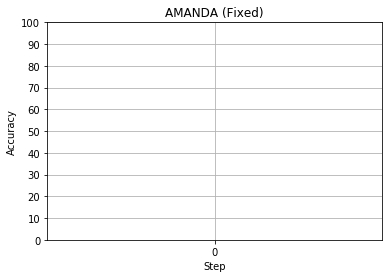

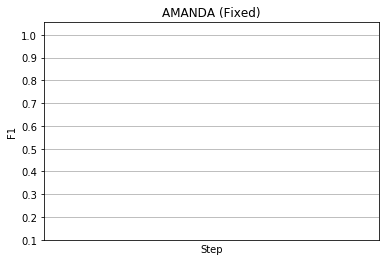

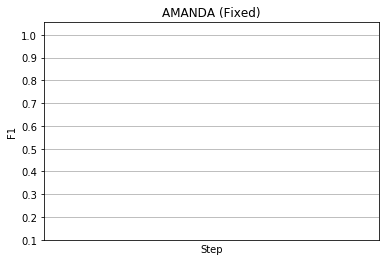




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  0.00940523456790121
Average error: 16.67
Average macro-F1: 1.0
Average micro-F1: 1.0
Average Accuracy:  83.33
Standard Deviation:  0.0
Variance:  0.0


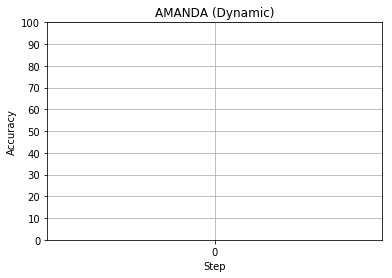

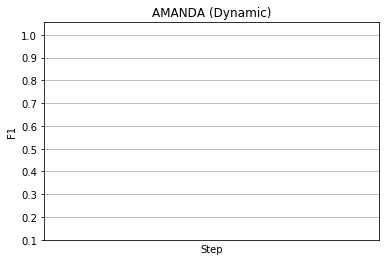

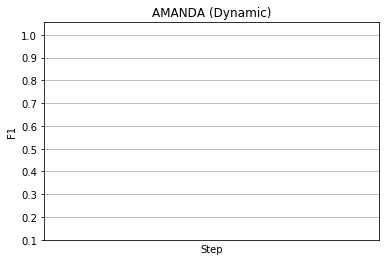




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  0.24366656790123464
Average error: 8.33
Average macro-F1: 1.0
Average micro-F1: 1.0
Average Accuracy:  91.67
Standard Deviation:  0.0
Variance:  0.0


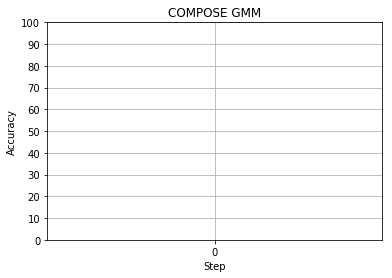

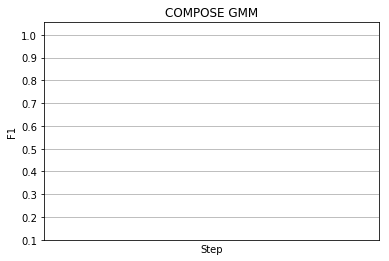

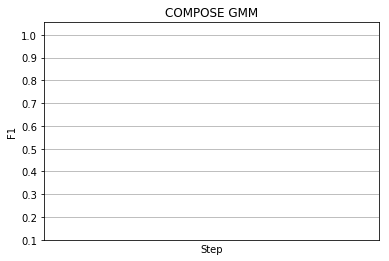

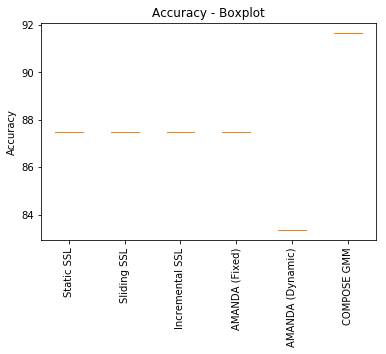

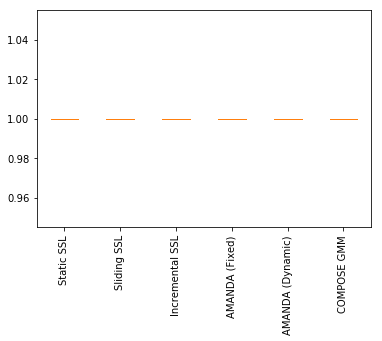

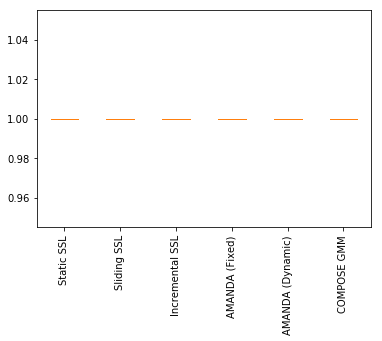

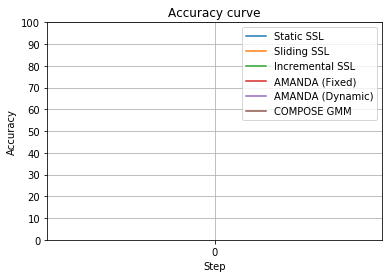

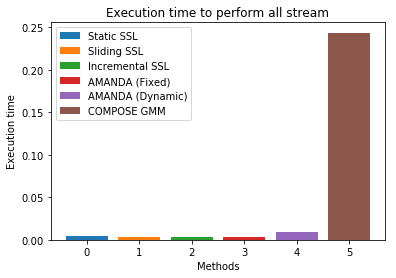

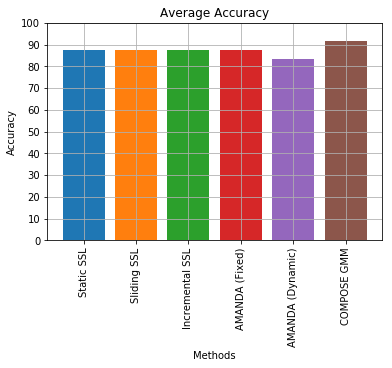

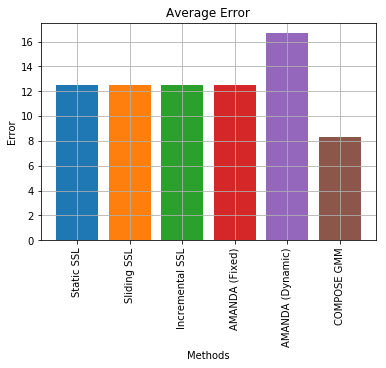

Error reduction: 0.0
Error reduction: 0.0
Error reduction: 0.0
Error reduction: -4.76571428571
Error reduction: 4.76571428571


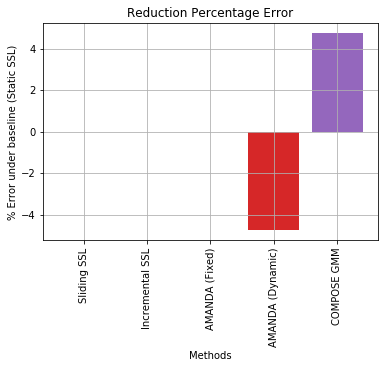

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
from methods import prequential_amanda_fixed
from methods import prequential_amanda_dynamic
from methods import prequential_static_classifier
from methods import prequential_deslizante_LN
from methods import prequential_incremental_LN
from methods import prequential_compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'knn' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 8
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    plot_animation = False
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadKeystroke(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))
    '''
    # Static SSL
    experiments[0] = Experiment(static_classifier, 7, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 7, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 7, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 7, 0.8, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 4, None, "kde", clfName=sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 2)
    '''
    #prequential evaluation
    steps = 1
    dataValues, dataLabels = dataValues[:labeledData], dataLabels[:labeledData]
    labeledData = int(0.7*len(dataLabels))
    experiments[0] = Experiment(prequential_static_classifier, 7, clfName=sslClassifier)
    experiments[1] = Experiment(prequential_deslizante_LN, 7, clfName=sslClassifier)
    experiments[2] = Experiment(prequential_incremental_LN, 7, clfName=sslClassifier)
    experiments[3] = Experiment(prequential_amanda_fixed, 7, 0.8, "kde", sslClassifier)
    experiments[4] = Experiment(prequential_amanda_dynamic, 4, None, "kde", clfName=sslClassifier)
    experiments[5] = Experiment(prequential_compose_gmm_version, 2, 0.8)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'keystroke', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw[:labeledData], "accuracies":originalAccsLevelIw[:labeledData], "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()